These are the required imports to complete the data acquisition and analyisis

In [54]:
import requests
import json
import numpy as np
import pandas as pd
import csv
from google.cloud import storage
from google.oauth2 import service_account
from io import StringIO

Here we create a credntials object based off of the service account created on GCP. We then create a client to connect to the storage bucket.

In [55]:
credentials = service_account.Credentials.from_service_account_file(r"H:/comp574/comp574racedataproject-7e1b6f08785b.json")

client = storage.Client(credentials=credentials, project=credentials.project_id)

We create a bucket object with the name of the bucket to be accessed.

In [56]:
bucket = client.get_bucket("project_race_data2")

Here we create blob objects and pass them the names of the files we want from the bucket

In [57]:
blob1 = bucket.get_blob(f"driver_stats_2020.csv")
blob2 = bucket.get_blob(f"race_results_2020.csv")

We then download the blobs from the bucket as strings

In [58]:
driver_stats_2020_string = blob1.download_as_string()
race_results_2020_string = blob2.download_as_string()

We then set those strings to new strings formatted to utf-8 encodoing

In [59]:
s1 = str(driver_stats_2020_string, "utf-8")
s2 = str(race_results_2020_string, "utf-8")

Here we use StringIO to make the strings look like a file

In [60]:
s1 = StringIO(s1)
s2 = StringIO(s2)

We then use the standard pd.read_csv method from pandas to read the data into data frames.

In [61]:
driver_df = pd.read_csv(s1)
race_df = pd.read_csv(s2)

We perform a .head on each data frame to check the data is propoerly formatted and correct

In [62]:
driver_df.head()

position      driver_name  driver_id  points  delta  wins  playoff_points  \
0         1    Chase Elliott       4062    5040      0     5              27   
1         2  Brad Keselowski       1816    5035     -5     4              35   
2         3      Joey Logano       3859    5034     -6     3              22   
3         4     Denny Hamlin       1361    5033     -7     7              54   
4         5    Kevin Harvick       1416    2410  -2630     9              67   

   duels_points  playoff_rank  total_races  ...  most_race_led  \
0             0             1           36  ...              4   
1             7             2           36  ...              2   
2            10             3           36  ...              3   
3             0             4           36  ...              7   
4             7             5           36  ...             10   

   average_finish_position  best_finish_position  top_5  top_10  top_20  \
0                     11.7                     1     15      22      28   
1                     10.1                     1     13      24      33   
2                     11.9                     1     12      21      28   
3                      9.3                     1     18      21      32   
4                      7.3                     1     20      27      35   

   top_30_plus  stage_top_10s  stage_points  \
0            3             50           310   
1            3             40           251   
2            2             50           307   
3            0             38           279   
4            0             47           289   

                                    weekly_race_info  
0  [{'raceId': 4871, 'finishing_position': 17, 't...  
1  [{'raceId': 4871, 'finishing_position': 36, 't...  
2  [{'raceId': 4871, 'finishing_position': 26, 't...  
3  [{'raceId': 4871, 'finishing_position': 1, 'tr...  
4  [{'raceId': 4871, 'finishing_position': 5, 'tr...  

[5 rows x 24 columns]

In [63]:
race_df.head()

race_id  series_id  race_season                              race_name  \
0     4868          1         2020                 Busch Clash at DAYTONA   
1     4869          1         2020  Bluegreen Vacations Duel 1 at DAYTONA   
2     4870          1         2020  Bluegreen Vacations Duel 2 at DAYTONA   
3     4871          1         2020                            DAYTONA 500   
4     4873          1         2020   Pennzoil 400 presented by Jiffy Lube   

   race_type_id  restrictor_plate  track_id                      track_name  \
0             2              True       105  Daytona International Speedway   
1             2              True       105  Daytona International Speedway   
2             2              True       105  Daytona International Speedway   
3             1              True       105  Daytona International Speedway   
4             1             False        42        Las Vegas Motor Speedway   

        date_scheduled            race_date  ... television_broadcaster  \
0  2020-02-09T15:00:00  2020-02-09T15:00:00  ...                    FS1   
1  2020-02-13T19:00:00  2020-02-13T19:00:00  ...                    FS1   
2  2020-02-13T20:45:00  2020-02-13T20:45:00  ...                    FS1   
3  2020-02-16T14:30:00  2020-02-17T16:00:00  ...                    FOX   
4  2020-02-23T15:30:00  2020-02-23T15:30:00  ...                    FOX   

   master_race_id  inspection_complete  playoff_round  is_qualifying_race  \
0            3222                 True              0               False   
1            3217                 True              0                True   
2            3218                 True              0                True   
3             385                 True              0               False   
4            1824                 True              0               False   

   qualifying_race_no  qualifying_race_id  has_qualifying  winner_driver_id  \
0                   0                  -1           False              4059   
1                   1                  -1           False              3859   
2                   2                  -1           False              4184   
3                   0                  -1           False              1361   
4                   0                  -1           False              3859   

   pole_winner_laptime  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  

[5 rows x 43 columns]

Then, a .columns mehtod is used to see all of the data columns in each data frame 

In [64]:
race_df.columns

Index(['race_id', 'series_id', 'race_season', 'race_name', 'race_type_id',
       'restrictor_plate', 'track_id', 'track_name', 'date_scheduled',
       'race_date', 'qualifying_date', 'scheduled_distance', 'actual_distance',
       'scheduled_laps', 'actual_laps', 'stage_1_laps', 'stage_2_laps',
       'stage_3_laps', 'number_of_cars_in_field', 'pole_winner_driver_id',
       'pole_winner_speed', 'number_of_lead_changes', 'number_of_leaders',
       'number_of_cautions', 'number_of_caution_laps', 'average_speed',
       'total_race_time', 'margin_of_victory', 'race_purse', 'race_comments',
       'attendance', 'infractions', 'radio_broadcaster',
       'television_broadcaster', 'master_race_id', 'inspection_complete',
       'playoff_round', 'is_qualifying_race', 'qualifying_race_no',
       'qualifying_race_id', 'has_qualifying', 'winner_driver_id',
       'pole_winner_laptime'],
      dtype='object')

In [65]:
driver_df.columns

Index(['position', 'driver_name', 'driver_id', 'points', 'delta', 'wins',
       'playoff_points', 'duels_points', 'playoff_rank', 'total_races',
       'poles', 'stage_wins', 'car_number', 'race_led', 'most_race_led',
       'average_finish_position', 'best_finish_position', 'top_5', 'top_10',
       'top_20', 'top_30_plus', 'stage_top_10s', 'stage_points',
       'weekly_race_info'],
      dtype='object')

Lastly, before any data manipiulation, we use a .dtypes method to see the differnet data types of each columns in the data frames.

In [66]:
driver_df.dtypes

position                     int64
driver_name                 object
driver_id                    int64
points                       int64
delta                        int64
wins                         int64
playoff_points               int64
duels_points                 int64
playoff_rank                 int64
total_races                  int64
poles                        int64
stage_wins                   int64
car_number                   int64
race_led                     int64
most_race_led                int64
average_finish_position    float64
best_finish_position         int64
top_5                        int64
top_10                       int64
top_20                       int64
top_30_plus                  int64
stage_top_10s                int64
stage_points                 int64
weekly_race_info            object
dtype: object

In [67]:
race_df.dtypes

race_id                      int64
series_id                    int64
race_season                  int64
race_name                   object
race_type_id                 int64
restrictor_plate              bool
track_id                     int64
track_name                  object
date_scheduled              object
race_date                   object
qualifying_date             object
scheduled_distance         float64
actual_distance            float64
scheduled_laps               int64
actual_laps                  int64
stage_1_laps                 int64
stage_2_laps                 int64
stage_3_laps                 int64
number_of_cars_in_field      int64
pole_winner_driver_id        int64
pole_winner_speed          float64
number_of_lead_changes       int64
number_of_leaders            int64
number_of_cautions           int64
number_of_caution_laps       int64
average_speed              float64
total_race_time             object
margin_of_victory           object
race_purse          

Below shows the mean and standard deviation of the stage_points column, a quantitive data type, in the driver data frame. .mean() is used to find the mean and .std() is used to find the standard deviation. Both the mean and standard devation show that
a large portion of drivers earned little to no stage points over the 2020 season. A high standard deviation means that many of the drivers earned much less stage points compared to the mean.

In [68]:
stgPoint_mean = driver_df['stage_points'].mean()
stgPoint_variance = driver_df['stage_points'].std()

print("The mean stage points earned was: " + str(stgPoint_mean))
print("The standard deviation of stage points earned was: " + str(stgPoint_variance))

The mean stage points earned was: 72.85185185185185
The standard deviation of stage points earned was: 106.75176767701005


Below is the mode of the television_broadcaster column, a qualitive data type, in the race data frame. .mode() is used to find the mode.
The mode shows which TV boradcaster carried the most races during the 2020 season.

In [69]:
tvBroadcaster_mode = race_df['television_broadcaster'].mode()

print("The mode of the television_broadcaster column is: " + str(tvBroadcaster_mode))


The mode of the television_broadcaster column is: 0    NBCSN
dtype: object


Below is the mean and max of the average_speed column, a quantitive data type, in the race data frame. .mean() and .max() are used to find the mean and max. For the mean, this is the average of the average speeds of each reace in 2020. The max is the fastest average speed for the 2020 season. For both, there is a concession to make. Since every track is different, the average speed is not weighted.

In [70]:
avLap_mean = race_df['average_speed'].mean()
avLap_max = race_df['average_speed'].max()

print("The mean of average speeds is: " + str(avLap_mean))
print("The max of average speeds is: " + str(avLap_max))

The mean of average speeds is: 120.03641463414631
The max of average speeds is: 170.99400000000003


What driver had the most wins in 2020 and how many total laps did they run during these races?
    To answer this we first use .loc to find the driver and their row. From here, we get their name and id using the .at method. Then,
    we use group by on the race data frame to get only the data for each driver who won races based on the
    winning_driver_id column. Then, we find the row for our driver by using .loc again and matching the winning_driver_id index
    to the found winning_driver_id. We then get the actual_laps ran data using .at and print the fidnings.
In this case, Kevin Harvick won the most races adnd competed 2404 laps in the races he won.

In [71]:
winning_driver = driver_df.loc[driver_df['wins'] == driver_df['wins'].max()]
winning_driver_name = winning_driver.at[4,'driver_name']
winning_driver_id = winning_driver.at[4,'driver_id']
most_races = race_df.groupby('winner_driver_id').sum()
laps_run_df = most_races.loc[most_races.index == winning_driver_id]
laps_run = laps_run_df.at[1416, 'actual_laps']
print("Laps run by " + winning_driver_name + " in the races he won in 2020: " + str(laps_run))

Laps run by Kevin Harvick in the races he won in 2020: 2404


What is the name of the driver that had the most wins while also having less than 8 top tens? To answer this we first find the drivers from the drivers data frame with 8 or less top tens using .loc. Then we locate the driver with the most wins out of those drivers using .loc again. Lastly, we use .at to get just the name of the driver.

In [72]:
driver_tens_df = driver_df.loc[driver_df['top_10'] <= 8]
driver_tens_max = driver_tens_df.loc[driver_tens_df['wins'] == driver_tens_df['wins'].max()]
driver_tens_name = driver_tens_max.at[15, 'driver_name']
print("The driver with the most wins and less than 8 top tens is " + driver_tens_name)

The driver with the most wins and less than 8 top tens is Cole Custer


What top 10 tracks had the most lead changes during a race? First, we need to grab the races with the 10 highest lead changes. We sort the main race data frame and set it to a new data frame called lead_df. Then, I use .iloc to slice and select and first 10 rows and the 'track_name' and 'number_of_lead_changes' columns. Then I reset the index so that the graph works properly. I then use a matplotlibb bar graph and graph the data. I set the x and y axis labels as well as the title and make the xtick labels be the track names. I could have made the track names be the index of the data frame, but the graph wouild then drop the duplicate index names. The bar graph shows this data and as noted in the title, the track names that repeat represent different races that took place at the same track.

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.widgets import TextBox
plt.style.use('seaborn-white')

In [74]:
lead_df = race_df.sort_values(by='number_of_lead_changes', ascending=False)
lead_df = lead_df.iloc[:10, [7, 21]]
#lead_df.set_index(lead_df['race_id'], inplace=True)
#lead_df = lead_df.drop(['race_id'], axis=1)
lead_df = lead_df.reset_index(drop=True)

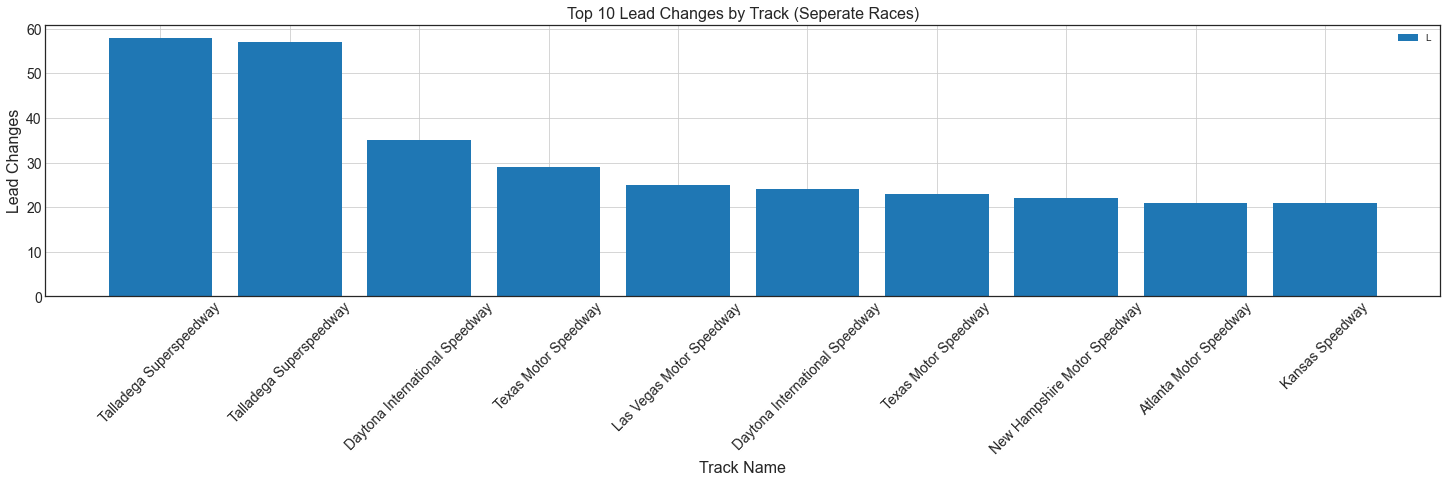

In [75]:
fig = plt.figure(figsize=(25,5))
plt.bar(lead_df.index, lead_df['number_of_lead_changes'])
track_names = lead_df['track_name'].tolist()
plt.title('Top 10 Lead Changes by Track (Seperate Races)', fontsize=16)
plt.ylabel('Lead Changes', fontsize=16)
plt.xlabel('Track Name', fontsize=16)
plt.yticks(fontsize=14)
plt.grid()
plt.legend('Lead Changes by Race')
plt.xticks(np.arange(10), ('Talladega Superspeedway',
 'Talladega Superspeedway',
 'Daytona International Speedway',
 'Texas Motor Speedway',
 'Las Vegas Motor Speedway',
 'Daytona International Speedway',
 'Texas Motor Speedway',
 'New Hampshire Motor Speedway',
 'Atlanta Motor Speedway',
 'Kansas Speedway'), fontsize=14, rotation=45)
plt.show()

What are the lap leader metrics of the playoff tracks? This means how many drivers led the race at a given track dur9ng the playoffs. First, we select the races that are in the playoffs by using .loc and specifying that the selected data has to have a int greater than 0 in the playoff_round cloumn in order to designate it as being playoff race. Then, we use .iloc to select the columns we want which are the track_name and number_of_leaders columns. Then, we set the index to the track name since there are no duplicates. Then we drop the extra track_name cloumn. Then a line plot is used visualize this data. The y axis shows the lap leader count and the x axis shows the track names.

In [76]:
playoffLeaders_df = race_df.loc[race_df['playoff_round'] > 0]
playoffLeaders_df = playoffLeaders_df.iloc[:, [7,22]]
playoffLeaders_df.set_index(playoffLeaders_df['track_name'], inplace=True)
playoffLeaders_df = playoffLeaders_df.drop(['track_name'], axis=1)

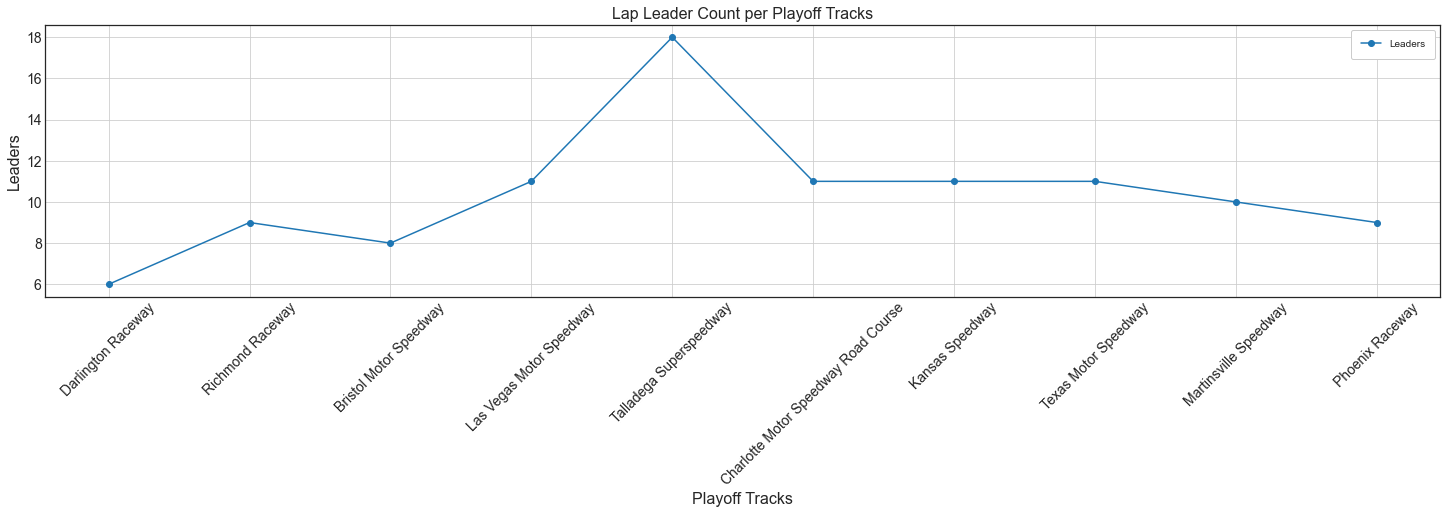

In [77]:
fig = plt.figure(figsize=(25, 5))
plt.plot(playoffLeaders_df.index, playoffLeaders_df['number_of_leaders'], label="Leaders", marker='o')
plt.grid()
plt.title("Lap Leader Count per Playoff Tracks", fontsize=16)
plt.ylabel("Leaders", fontsize=16)
plt.xlabel("Playoff Tracks", fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.legend(frameon=True, fancybox=True, framealpha=1, borderpad=1)
plt.show()